In [9]:
import cv2
import os
import PIL
import skimage
from skimage import data
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
from scipy import ndimage, misc


In [10]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    image_name=[]
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) if f.endswith(".jpg")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(str(d))
            image_name.append(str(f))
    return images, labels,image_name

In [26]:
ROOT_PATH = '/home/tang/targa/exp4/size160*80/'

train_data_directory = os.path.join(ROOT_PATH, "train")
test_data_directory = os.path.join(ROOT_PATH, "test")
validation_data_directory = os.path.join(ROOT_PATH,'validation')
total_data_directory = os.path.join(ROOT_PATH, "total_data")

In [ ]:
os.listdir(total_data_directory+'/0')

In [11]:
Images,Labels,Image_names = load_data(total_data_directory)

In [55]:
os.path.basename(Image_names[0])

'J_saltnoise_amount_0.428.jpg'

In [12]:
Image_names[7]

'/home/tang/targa/exp4/size160*80/total_data/J/J_random_bluring_h_13_w_21.jpg'

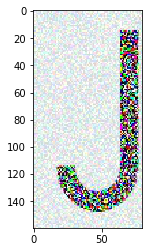

In [13]:
plt.imshow(Images[0])

In [14]:
Labels[0]

'J'

In [15]:
len(Labels)

25112

In [19]:
#########define percentage of dataset
total_number = len(Labels)
train_number = int(total_number*0.8)
test_number = int(total_number*0.1)
validation_number = total_number-train_number-test_number

In [20]:
print('- Training-set:\t\t{}'.format(train_number))
print('- Test-set:\t\t{}'.format(test_number))
print('- Validation-set:\t{}'.format(validation_number))

- Training-set:		20089
- Test-set:		2511
- Validation-set:	2512


In [21]:
from random import sample


In [57]:
totalset_index = []
trainset_index = []
testset_index=[]
validationset_index=[]


In [58]:
#########generate total images index
for i in range(0,len(Labels)):
    totalset_index.append(str(i))

In [59]:
trainset_index = sample(totalset_index,train_number)

In [60]:
print('- Total-set index length:\t{}'.format(len(totalset_index)))
print('- Training-set index length:\t\t{}'.format(len(trainset_index)))
print('- Testing-set index length:\t\t{}'.format(len(testset_index)))
print('- Validation-set index length:\t{}'.format(len(validationset_index)))

- Total-set index length:	25112
- Training-set index length:		20089
- Testing-set index length:		0
- Validation-set index length:	0


In [ ]:
for i in trainset_index:
    filename = train_data_directory+'/'+Labels[int(i)]+'/'+os.path.basename(Image_names[int(i)])
    plt.imsave(filename,Images[int(i)])
    #print(filename)
    totalset_index.remove(i)

In [63]:
print('- Total-set index length:\t{}'.format(len(totalset_index)))
print('- Training-set index length:\t\t{}'.format(len(trainset_index)))
print('- Testing-set index length:\t\t{}'.format(len(testset_index)))
print('- Validation-set index length:\t{}'.format(len(validationset_index)))

- Total-set index length:	5023
- Training-set index length:		20089
- Testing-set index length:		0
- Validation-set index length:	0


In [64]:
testset_index= sample(totalset_index,test_number)

In [ ]:
for i in testset_index:
    filename = test_data_directory+'/'+Labels[int(i)]+'/'+os.path.basename(Image_names[int(i)])
    plt.imsave(filename,Images[int(i)])
    #print(filename)
    totalset_index.remove(i)
 

In [66]:
print('- Total-set index length:\t{}'.format(len(totalset_index)))
print('- Training-set index length:\t\t{}'.format(len(trainset_index)))
print('- Testing-set index length:\t\t{}'.format(len(testset_index)))
print('- Validation-set index length:\t{}'.format(len(validationset_index)))

- Total-set index length:	2512
- Training-set index length:		20089
- Testing-set index length:		2511
- Validation-set index length:	0


In [71]:
validationset_index= sample(totalset_index,validation_number)

In [72]:
for i in validationset_index:
    filename = validation_data_directory+'/'+Labels[int(i)]+'/'+os.path.basename(Image_names[int(i)])
    plt.imsave(filename,Images[int(i)])
    #print(filename)
    totalset_index.remove(i)

/home/tang/targa/exp4/size160*80/validation/7/7_median_bluring_18.jpg
/home/tang/targa/exp4/size160*80/validation/5/5_possionnoise_lamda_902.jpg
/home/tang/targa/exp4/size160*80/validation/S/S_random_bluring_h_11_w_21.jpg
/home/tang/targa/exp4/size160*80/validation/R/R_specklenoise_sigma_94.jpg
/home/tang/targa/exp4/size160*80/validation/V/V_affined_shear_00-50_sx_1_sy_-1_r_-20_th_-59_tw_14.jpg
/home/tang/targa/exp4/size160*80/validation/9/9_perspective_1_11_4_152_63_141_64_2.jpg
/home/tang/targa/exp4/size160*80/validation/9/9_gaussian_sigma_0.139.jpg
/home/tang/targa/exp4/size160*80/validation/5/5_bilateral_bluring_color7spatial_18.jpg
/home/tang/targa/exp4/size160*80/validation/N/N_affined_shear_00-50_sx_0_sy_1_r_16_th_48_tw_-20.jpg
/home/tang/targa/exp4/size160*80/validation/R/R_perspective_13_8_18_156_76_157_61_32.jpg
/home/tang/targa/exp4/size160*80/validation/6/6_gaussian_sigma_0.173.jpg
/home/tang/targa/exp4/size160*80/validation/8/8_peppernoise_amount_0.172.jpg
/home/tang/targa

/home/tang/targa/exp4/size160*80/validation/C/C_salt&pepper_amount_0.12ratio of s&p_0.68.jpg
/home/tang/targa/exp4/size160*80/validation/Z/Z_saltnoise_amount_0.032.jpg
/home/tang/targa/exp4/size160*80/validation/1/1_rotate__25.jpg
/home/tang/targa/exp4/size160*80/validation/H/H_perspective_0_7_18_132_64_137_75_31.jpg
/home/tang/targa/exp4/size160*80/validation/N/N_gamma__6.18.jpg
/home/tang/targa/exp4/size160*80/validation/T/T_possionnoise_lamda_296.jpg
/home/tang/targa/exp4/size160*80/validation/P/P_random_bluring_h_16_w_13.jpg
/home/tang/targa/exp4/size160*80/validation/F/F_perspective_10_39_1_123_64_143_72_7.jpg
/home/tang/targa/exp4/size160*80/validation/J/J_gaussian_sigma_0.158.jpg
/home/tang/targa/exp4/size160*80/validation/J/J_possionnoise_lamda_722.jpg
/home/tang/targa/exp4/size160*80/validation/D/D_possionnoise_lamda_216.jpg
/home/tang/targa/exp4/size160*80/validation/9/9_random_bluring_h_24_w_19.jpg
/home/tang/targa/exp4/size160*80/validation/H/H_saltnoise_amount_0.125.jpg
/h

/home/tang/targa/exp4/size160*80/validation/V/V_specklenoise_sigma_94.jpg
/home/tang/targa/exp4/size160*80/validation/1/1_gaussian_sigma_0.176.jpg
/home/tang/targa/exp4/size160*80/validation/W/W_specklenoise_sigma_36.jpg
/home/tang/targa/exp4/size160*80/validation/F/F_gaussian_sigma_0.172.jpg
/home/tang/targa/exp4/size160*80/validation/W/W_peppernoise_amount_0.113.jpg
/home/tang/targa/exp4/size160*80/validation/C/C_specklenoise_sigma_225.jpg
/home/tang/targa/exp4/size160*80/validation/X/X_saltnoise_amount_0.013.jpg
/home/tang/targa/exp4/size160*80/validation/B/B_possionnoise_lamda_38.jpg
/home/tang/targa/exp4/size160*80/validation/L/L_percentile_bluring_percentile_66_size_21.jpg
/home/tang/targa/exp4/size160*80/validation/C/Cv__41.jpg
/home/tang/targa/exp4/size160*80/validation/M/M_bilateral_bluring_color4spatial_6.jpg
/home/tang/targa/exp4/size160*80/validation/6/6_affined_shear_00-50_sx_-1_sy_0_r_-10_th_14_tw_-15.jpg
/home/tang/targa/exp4/size160*80/validation/6/6_percentile_bluring_

/home/tang/targa/exp4/size160*80/validation/K/K_saltnoise_amount_0.344.jpg
/home/tang/targa/exp4/size160*80/validation/V/V_gaussian_sigma_0.044.jpg
/home/tang/targa/exp4/size160*80/validation/P/P_specklenoise_sigma_143.jpg
/home/tang/targa/exp4/size160*80/validation/4/4_affined_shear_00-50_sx_0_sy_1_r_-23_th_45_tw_24.jpg
/home/tang/targa/exp4/size160*80/validation/P/P_peppernoise_amount_0.485.jpg
/home/tang/targa/exp4/size160*80/validation/7/7_translation__-51_31.jpg
/home/tang/targa/exp4/size160*80/validation/1/1_possionnoise_lamda_246.jpg
/home/tang/targa/exp4/size160*80/validation/S/S_perspective_12_28_17_120_78_152_69_34.jpg
/home/tang/targa/exp4/size160*80/validation/T/T_affined_shear_00-50_sx_1_sy_0_r_-12_th_-14_tw_31.jpg
/home/tang/targa/exp4/size160*80/validation/6/6_maximum_bluring_size13.0.jpg
/home/tang/targa/exp4/size160*80/validation/L/L_salt&pepper_amount_0.423ratio of s&p_0.6.jpg
/home/tang/targa/exp4/size160*80/validation/G/G_gaussian_sigma_0.279.jpg
/home/tang/targa/ex

/home/tang/targa/exp4/size160*80/validation/G/G_possionnoise_lamda_999.jpg
/home/tang/targa/exp4/size160*80/validation/9/9_affined_shear_00-50_sx_0_sy_-1_r_-5_th_-17_tw_-20.jpg
/home/tang/targa/exp4/size160*80/validation/X/Xh__28.jpg
/home/tang/targa/exp4/size160*80/validation/S/S_affined_shear_00-50_sx_1_sy_0_r_18_th_78_tw_30.jpg
/home/tang/targa/exp4/size160*80/validation/P/P_salt&pepper_amount_0.162ratio of s&p_0.47.jpg
/home/tang/targa/exp4/size160*80/validation/M/M_perspective_17_36_9_141_66_132_60_5.jpg
/home/tang/targa/exp4/size160*80/validation/V/V_salt&pepper_amount_0.378ratio of s&p_0.43.jpg
/home/tang/targa/exp4/size160*80/validation/D/D_percentile_bluring_percentile_35_size_25.jpg
/home/tang/targa/exp4/size160*80/validation/L/L_perspective_18_2_13_157_63_147_78_7.jpg
/home/tang/targa/exp4/size160*80/validation/V/V_salt&pepper_amount_0.364ratio of s&p_0.4.jpg
/home/tang/targa/exp4/size160*80/validation/F/F_perspective_5_30_9_134_69_131_68_25.jpg
/home/tang/targa/exp4/size160

/home/tang/targa/exp4/size160*80/validation/A/A_specklenoise_sigma_13.jpg
/home/tang/targa/exp4/size160*80/validation/6/6_salt&pepper_amount_0.227ratio of s&p_0.44.jpg
/home/tang/targa/exp4/size160*80/validation/G/G_gamma__9.08.jpg
/home/tang/targa/exp4/size160*80/validation/X/X_gaussian_sigma_0.198.jpg
/home/tang/targa/exp4/size160*80/validation/8/8_saltnoise_amount_0.301.jpg
/home/tang/targa/exp4/size160*80/validation/D/D_bilateral_bluring_color14spatial_4.jpg
/home/tang/targa/exp4/size160*80/validation/R/R_gaussian_sigma_0.207.jpg
/home/tang/targa/exp4/size160*80/validation/X/X_salt&pepper_amount_0.221ratio of s&p_0.51.jpg
/home/tang/targa/exp4/size160*80/validation/M/M_affined_shear_00-50_sx_-1_sy_-1_r_-21_th_40_tw_-34.jpg
/home/tang/targa/exp4/size160*80/validation/6/6_affined_shear_00-50_sx_0_sy_-1_r_-20_th_59_tw_-10.jpg
/home/tang/targa/exp4/size160*80/validation/0/0_perspective_8_14_1_153_76_127_73_37.jpg
/home/tang/targa/exp4/size160*80/validation/F/F_perspective_11_37_4_123_7

/home/tang/targa/exp4/size160*80/validation/N/N_possionnoise_lamda_6.jpg
/home/tang/targa/exp4/size160*80/validation/R/R_affined_shear_00-50_sx_1_sy_-1_r_0_th_47_tw_33.jpg
/home/tang/targa/exp4/size160*80/validation/3/3_salt&pepper_amount_0.477ratio of s&p_0.43.jpg
/home/tang/targa/exp4/size160*80/validation/F/F_specklenoise_sigma_250.jpg
/home/tang/targa/exp4/size160*80/validation/A/A_possionnoise_lamda_590.jpg
/home/tang/targa/exp4/size160*80/validation/C/C_perspective_12_4_7_129_67_140_72_26.jpg
/home/tang/targa/exp4/size160*80/validation/G/G_possionnoise_lamda_872.jpg
/home/tang/targa/exp4/size160*80/validation/1/1_salt&pepper_amount_0.139ratio of s&p_0.46.jpg
/home/tang/targa/exp4/size160*80/validation/E/E_gaussian_bluring_sigma7.87.jpg
/home/tang/targa/exp4/size160*80/validation/6/6_perspective_11_6_3_124_63_138_74_15.jpg
/home/tang/targa/exp4/size160*80/validation/T/T_affined_shear_00-50_sx_0_sy_0_r_9_th_-46_tw_11.jpg
/home/tang/targa/exp4/size160*80/validation/0/0v__9.jpg
/home

/home/tang/targa/exp4/size160*80/validation/P/P_affined_shear_00-50_sx_0_sy_1_r_-13_th_-64_tw_-24.jpg
/home/tang/targa/exp4/size160*80/validation/F/F_rotate__-15.jpg
/home/tang/targa/exp4/size160*80/validation/W/W_affined_shear_00-50_sx_0_sy_1_r_-19_th_-64_tw_-35.jpg
/home/tang/targa/exp4/size160*80/validation/Z/Z_gaussian_bluring_sigma1.6.jpg
/home/tang/targa/exp4/size160*80/validation/V/V_maximum_bluring_size4.0.jpg
/home/tang/targa/exp4/size160*80/validation/0/0_bilateral_bluring_color2spatial_7.jpg
/home/tang/targa/exp4/size160*80/validation/1/1_gaussian_sigma_0.183.jpg
/home/tang/targa/exp4/size160*80/validation/2/2_gaussian_bluring_sigma0.17.jpg
/home/tang/targa/exp4/size160*80/validation/W/W_possionnoise_lamda_61.jpg
/home/tang/targa/exp4/size160*80/validation/8/8h__47.jpg
/home/tang/targa/exp4/size160*80/validation/K/K_peppernoise_amount_0.464.jpg
/home/tang/targa/exp4/size160*80/validation/1/1_salt&pepper_amount_0.298ratio of s&p_0.42.jpg
/home/tang/targa/exp4/size160*80/valid

/home/tang/targa/exp4/size160*80/validation/C/C_peppernoise_amount_0.182.jpg
/home/tang/targa/exp4/size160*80/validation/6/6_affined_shear_00-50_sx_0_sy_1_r_-14_th_2_tw_-6.jpg
/home/tang/targa/exp4/size160*80/validation/8/8_sheared__00-45.jpg
/home/tang/targa/exp4/size160*80/validation/M/M_affined_shear_00-50_sx_1_sy_-1_r_-4_th_-24_tw_-17.jpg
/home/tang/targa/exp4/size160*80/validation/G/G_possionnoise_lamda_262.jpg
/home/tang/targa/exp4/size160*80/validation/P/P_specklenoise_sigma_183.jpg
/home/tang/targa/exp4/size160*80/validation/9/9_rotate__-17.jpg
/home/tang/targa/exp4/size160*80/validation/1/1_possionnoise_lamda_751.jpg
/home/tang/targa/exp4/size160*80/validation/9/9_salt&pepper_amount_0.127ratio of s&p_0.51.jpg
/home/tang/targa/exp4/size160*80/validation/7/7_affined_shear_00-50_sx_-1_sy_0_r_-1_th_27_tw_0.jpg
/home/tang/targa/exp4/size160*80/validation/P/P_rotate__22.jpg
/home/tang/targa/exp4/size160*80/validation/D/D_salt&pepper_amount_0.065ratio of s&p_0.56.jpg
/home/tang/targa

/home/tang/targa/exp4/size160*80/validation/Y/Y_maximum_bluring_size3.0.jpg
/home/tang/targa/exp4/size160*80/validation/H/H_saltnoise_amount_0.336.jpg
/home/tang/targa/exp4/size160*80/validation/R/R_salt&pepper_amount_0.483ratio of s&p_0.37.jpg
/home/tang/targa/exp4/size160*80/validation/0/0_bilateral_bluring_color5spatial_5.jpg
/home/tang/targa/exp4/size160*80/validation/S/S_affined_shear_00-50_sx_0_sy_1_r_10_th_31_tw_23.jpg
/home/tang/targa/exp4/size160*80/validation/P/P_specklenoise_sigma_168.jpg
/home/tang/targa/exp4/size160*80/validation/R/R_perspective_15_4_12_124_77_156_79_34.jpg
/home/tang/targa/exp4/size160*80/validation/5/5v__104.jpg
/home/tang/targa/exp4/size160*80/validation/5/5_possionnoise_lamda_282.jpg
/home/tang/targa/exp4/size160*80/validation/9/9_perspective_1_26_2_156_63_128_63_14.jpg
/home/tang/targa/exp4/size160*80/validation/L/L_sheared__000.jpg
/home/tang/targa/exp4/size160*80/validation/A/A_possionnoise_lamda_586.jpg
/home/tang/targa/exp4/size160*80/validation/Y

/home/tang/targa/exp4/size160*80/validation/M/M_specklenoise_sigma_173.jpg
/home/tang/targa/exp4/size160*80/validation/W/W_affined_shear_00-50_sx_-1_sy_0_r_-16_th_-21_tw_24.jpg
/home/tang/targa/exp4/size160*80/validation/2/2_possionnoise_lamda_675.jpg
/home/tang/targa/exp4/size160*80/validation/1/1_gamma__9.47.jpg
/home/tang/targa/exp4/size160*80/validation/3/3_affined_shear_00-50_sx_1_sy_1_r_-6_th_-74_tw_-36.jpg
/home/tang/targa/exp4/size160*80/validation/M/M_salt&pepper_amount_0.302ratio of s&p_0.49.jpg
/home/tang/targa/exp4/size160*80/validation/0/0_bilateral_bluring_color10spatial_16.jpg
/home/tang/targa/exp4/size160*80/validation/8/8_gaussian_bluring_sigma7.98.jpg
/home/tang/targa/exp4/size160*80/validation/0/0_specklenoise_sigma_270.jpg
/home/tang/targa/exp4/size160*80/validation/F/F_bilateral_bluring_color10spatial_22.jpg
/home/tang/targa/exp4/size160*80/validation/Y/Y_perspective_0_20_2_132_67_129_77_34.jpg
/home/tang/targa/exp4/size160*80/validation/B/B_affined_shear_00-50_sx_

/home/tang/targa/exp4/size160*80/validation/3/3_possionnoise_lamda_925.jpg
/home/tang/targa/exp4/size160*80/validation/N/N_gaussian_sigma_0.263.jpg
/home/tang/targa/exp4/size160*80/validation/P/P_salt&pepper_amount_0.327ratio of s&p_0.32.jpg
/home/tang/targa/exp4/size160*80/validation/1/1_affined_shear_00-50_sx_0_sy_0_r_-15_th_1_tw_-4.jpg
/home/tang/targa/exp4/size160*80/validation/X/X_gamma__1.73.jpg
/home/tang/targa/exp4/size160*80/validation/G/G_saltnoise_amount_0.116.jpg
/home/tang/targa/exp4/size160*80/validation/7/7_peppernoise_amount_0.041.jpg
/home/tang/targa/exp4/size160*80/validation/P/P_salt&pepper_amount_0.011ratio of s&p_0.42.jpg
/home/tang/targa/exp4/size160*80/validation/2/2_specklenoise_sigma_74.jpg
/home/tang/targa/exp4/size160*80/validation/9/9_affined_shear_00-50_sx_1_sy_0_r_27_th_30_tw_-4.jpg
/home/tang/targa/exp4/size160*80/validation/K/K_possionnoise_lamda_252.jpg
/home/tang/targa/exp4/size160*80/validation/J/J_specklenoise_sigma_165.jpg
/home/tang/targa/exp4/size

/home/tang/targa/exp4/size160*80/validation/G/G_salt&pepper_amount_0.272ratio of s&p_0.31.jpg
/home/tang/targa/exp4/size160*80/validation/K/K_affined_shear_00-50_sx_-1_sy_1_r_-6_th_-43_tw_-3.jpg
/home/tang/targa/exp4/size160*80/validation/1/1h__61.jpg
/home/tang/targa/exp4/size160*80/validation/A/A_salt&pepper_amount_0.103ratio of s&p_0.66.jpg
/home/tang/targa/exp4/size160*80/validation/4/4_possionnoise_lamda_298.jpg
/home/tang/targa/exp4/size160*80/validation/L/L_gaussian_sigma_0.058.jpg
/home/tang/targa/exp4/size160*80/validation/2/2_salt&pepper_amount_0.322ratio of s&p_0.36.jpg
/home/tang/targa/exp4/size160*80/validation/P/P_salt&pepper_amount_0.293ratio of s&p_0.64.jpg
/home/tang/targa/exp4/size160*80/validation/P/P_specklenoise_sigma_264.jpg
/home/tang/targa/exp4/size160*80/validation/Z/Z_average_bluring_h_16_w_11.jpg
/home/tang/targa/exp4/size160*80/validation/K/K_specklenoise_sigma_85.jpg
/home/tang/targa/exp4/size160*80/validation/K/K_peppernoise_amount_0.139.jpg
/home/tang/tar

/home/tang/targa/exp4/size160*80/validation/4/4_salt&pepper_amount_0.335ratio of s&p_0.48.jpg
/home/tang/targa/exp4/size160*80/validation/4/4h__30.jpg
/home/tang/targa/exp4/size160*80/validation/N/N_salt&pepper_amount_0.181ratio of s&p_0.37.jpg
/home/tang/targa/exp4/size160*80/validation/Z/Z_possionnoise_lamda_703.jpg
/home/tang/targa/exp4/size160*80/validation/R/R_possionnoise_lamda_715.jpg
/home/tang/targa/exp4/size160*80/validation/7/7h__2.jpg
/home/tang/targa/exp4/size160*80/validation/R/R_random_bluring_h_13_w_19.jpg
/home/tang/targa/exp4/size160*80/validation/4/4_perspective_11_6_10_152_67_129_62_21.jpg
/home/tang/targa/exp4/size160*80/validation/T/Th__18.jpg
/home/tang/targa/exp4/size160*80/validation/E/E_specklenoise_sigma_224.jpg
/home/tang/targa/exp4/size160*80/validation/0/0_salt&pepper_amount_0.444ratio of s&p_0.62.jpg
/home/tang/targa/exp4/size160*80/validation/B/B_possionnoise_lamda_116.jpg
/home/tang/targa/exp4/size160*80/validation/8/8_possionnoise_lamda_10.jpg
/home/ta

/home/tang/targa/exp4/size160*80/validation/6/6_perspective_8_30_2_149_73_130_69_35.jpg
/home/tang/targa/exp4/size160*80/validation/K/K_possionnoise_lamda_37.jpg
/home/tang/targa/exp4/size160*80/validation/G/G_perspective_11_9_6_151_66_145_63_17.jpg
/home/tang/targa/exp4/size160*80/validation/G/G_peppernoise_amount_0.017.jpg
/home/tang/targa/exp4/size160*80/validation/L/L_possionnoise_lamda_771.jpg
/home/tang/targa/exp4/size160*80/validation/0/0v__107.jpg
/home/tang/targa/exp4/size160*80/validation/W/W_maximum_bluring_size6.0.jpg
/home/tang/targa/exp4/size160*80/validation/A/A_possionnoise_lamda_480.jpg
/home/tang/targa/exp4/size160*80/validation/2/2_gaussian_sigma_0.02.jpg
/home/tang/targa/exp4/size160*80/validation/M/M_possionnoise_lamda_139.jpg
/home/tang/targa/exp4/size160*80/validation/2/2_salt&pepper_amount_0.12ratio of s&p_0.36.jpg
/home/tang/targa/exp4/size160*80/validation/9/9_bilateral_bluring_color1spatial_2.jpg
/home/tang/targa/exp4/size160*80/validation/H/H_specklenoise_si

/home/tang/targa/exp4/size160*80/validation/J/J_affined_shear_00-50_sx_-1_sy_0_r_-24_th_52_tw_-39.jpg
/home/tang/targa/exp4/size160*80/validation/B/B_affined_shear_00-50_sx_-1_sy_-1_r_-7_th_48_tw_-22.jpg
/home/tang/targa/exp4/size160*80/validation/D/D_perspective_18_21_16_152_63_131_60_31.jpg
/home/tang/targa/exp4/size160*80/validation/T/T_gamma__4.67.jpg
/home/tang/targa/exp4/size160*80/validation/N/N_salt&pepper_amount_0.315ratio of s&p_0.56.jpg
/home/tang/targa/exp4/size160*80/validation/G/G_salt&pepper_amount_0.099ratio of s&p_0.64.jpg
/home/tang/targa/exp4/size160*80/validation/J/J_salt&pepper_amount_0.395ratio of s&p_0.66.jpg
/home/tang/targa/exp4/size160*80/validation/8/8_saltnoise_amount_0.428.jpg
/home/tang/targa/exp4/size160*80/validation/C/C_perspective_2_3_0_157_66_132_61_31.jpg
/home/tang/targa/exp4/size160*80/validation/K/K_affined_shear_00-50_sx_0_sy_-1_r_22_th_43_tw_-25.jpg
/home/tang/targa/exp4/size160*80/validation/8/8_gamma__1.73.jpg
/home/tang/targa/exp4/size160*80/

/home/tang/targa/exp4/size160*80/validation/L/L_specklenoise_sigma_284.jpg
/home/tang/targa/exp4/size160*80/validation/G/G_affined_shear_00-50_sx_1_sy_1_r_-17_th_-41_tw_-39.jpg
/home/tang/targa/exp4/size160*80/validation/1/1_peppernoise_amount_0.113.jpg
/home/tang/targa/exp4/size160*80/validation/P/P_percentile_bluring_percentile_59_size_15.jpg
/home/tang/targa/exp4/size160*80/validation/K/K_bilateral_bluring_color5spatial_19.jpg
/home/tang/targa/exp4/size160*80/validation/2/2_affined_shear_00-50_sx_0_sy_1_r_14_th_61_tw_-26.jpg
/home/tang/targa/exp4/size160*80/validation/E/E_affined_shear_00-50_sx_0_sy_1_r_13_th_-8_tw_30.jpg
/home/tang/targa/exp4/size160*80/validation/C/C_specklenoise_sigma_98.jpg
/home/tang/targa/exp4/size160*80/validation/K/K_affined_shear_00-50_sx_0_sy_-1_r_4_th_55_tw_4.jpg
/home/tang/targa/exp4/size160*80/validation/H/H_bilateral_bluring_color6spatial_10.jpg
/home/tang/targa/exp4/size160*80/validation/W/Ws_W_.jpg
/home/tang/targa/exp4/size160*80/validation/X/X_pers

/home/tang/targa/exp4/size160*80/validation/T/T_bilateral_bluring_color10spatial_14.jpg
/home/tang/targa/exp4/size160*80/validation/B/B_salt&pepper_amount_0.3ratio of s&p_0.36.jpg
/home/tang/targa/exp4/size160*80/validation/K/K_possionnoise_lamda_185.jpg
/home/tang/targa/exp4/size160*80/validation/4/4_salt&pepper_amount_0.24ratio of s&p_0.48.jpg
/home/tang/targa/exp4/size160*80/validation/F/F_gamma__9.77.jpg
/home/tang/targa/exp4/size160*80/validation/L/L_perspective_4_12_5_131_73_139_64_15.jpg
/home/tang/targa/exp4/size160*80/validation/C/C_percentile_bluring_percentile_47_size_11.jpg
/home/tang/targa/exp4/size160*80/validation/H/H_salt&pepper_amount_0.334ratio of s&p_0.45.jpg
/home/tang/targa/exp4/size160*80/validation/P/P_perspective_18_16_0_147_60_152_74_20.jpg
/home/tang/targa/exp4/size160*80/validation/H/H_perspective_15_7_14_137_64_146_65_7.jpg
/home/tang/targa/exp4/size160*80/validation/D/D_specklenoise_sigma_99.jpg
/home/tang/targa/exp4/size160*80/validation/T/T_salt&pepper_am

/home/tang/targa/exp4/size160*80/validation/P/P_perspective_17_28_5_150_69_158_79_37.jpg
/home/tang/targa/exp4/size160*80/validation/C/C_perspective_8_7_8_123_74_155_69_26.jpg
/home/tang/targa/exp4/size160*80/validation/S/S_specklenoise_sigma_212.jpg
/home/tang/targa/exp4/size160*80/validation/W/W_perspective_7_21_18_123_78_125_78_39.jpg
/home/tang/targa/exp4/size160*80/validation/9/9_bilateral_bluring_color3spatial_4.jpg
/home/tang/targa/exp4/size160*80/validation/J/J_salt&pepper_amount_0.142ratio of s&p_0.33.jpg
/home/tang/targa/exp4/size160*80/validation/M/M_specklenoise_sigma_291.jpg
/home/tang/targa/exp4/size160*80/validation/Z/Z_affined_shear_00-50_sx_0_sy_1_r_27_th_2_tw_-37.jpg
/home/tang/targa/exp4/size160*80/validation/M/M_percentile_bluring_percentile_91_size_5.jpg
/home/tang/targa/exp4/size160*80/validation/W/W_possionnoise_lamda_928.jpg
/home/tang/targa/exp4/size160*80/validation/V/V_specklenoise_sigma_166.jpg
/home/tang/targa/exp4/size160*80/validation/9/9_affined_shear_00

/home/tang/targa/exp4/size160*80/validation/Y/Y_perspective_2_5_2_137_67_130_74_7.jpg
/home/tang/targa/exp4/size160*80/validation/3/3_saltnoise_amount_0.108.jpg
/home/tang/targa/exp4/size160*80/validation/H/H_perspective_2_22_8_123_62_154_77_1.jpg
/home/tang/targa/exp4/size160*80/validation/Z/Z_affined_shear_00-50_sx_-1_sy_1_r_25_th_-28_tw_9.jpg
/home/tang/targa/exp4/size160*80/validation/L/L_specklenoise_sigma_276.jpg
/home/tang/targa/exp4/size160*80/validation/H/H_salt&pepper_amount_0.407ratio of s&p_0.66.jpg
/home/tang/targa/exp4/size160*80/validation/H/H_perspective_14_26_4_128_76_147_67_24.jpg
/home/tang/targa/exp4/size160*80/validation/A/A_specklenoise_sigma_230.jpg
/home/tang/targa/exp4/size160*80/validation/8/8_salt&pepper_amount_0.323ratio of s&p_0.33.jpg
/home/tang/targa/exp4/size160*80/validation/0/0_average_bluring_h_2_w_24.jpg
/home/tang/targa/exp4/size160*80/validation/N/N_specklenoise_sigma_17.jpg
/home/tang/targa/exp4/size160*80/validation/0/0_specklenoise_sigma_289.jpg

/home/tang/targa/exp4/size160*80/validation/B/B_saltnoise_amount_0.02.jpg
/home/tang/targa/exp4/size160*80/validation/J/J_specklenoise_sigma_80.jpg
/home/tang/targa/exp4/size160*80/validation/P/Pv__72.jpg
/home/tang/targa/exp4/size160*80/validation/W/W_peppernoise_amount_0.298.jpg
/home/tang/targa/exp4/size160*80/validation/3/3_sheared__0039.jpg
/home/tang/targa/exp4/size160*80/validation/Y/Y_saltnoise_amount_0.072.jpg
/home/tang/targa/exp4/size160*80/validation/K/K_gaussian_bluring_sigma4.01.jpg
/home/tang/targa/exp4/size160*80/validation/7/7_peppernoise_amount_0.285.jpg
/home/tang/targa/exp4/size160*80/validation/6/6_affined_shear_00-50_sx_0_sy_1_r_28_th_50_tw_3.jpg
/home/tang/targa/exp4/size160*80/validation/3/3_saltnoise_amount_0.201.jpg
/home/tang/targa/exp4/size160*80/validation/1/1_gamma__7.23.jpg
/home/tang/targa/exp4/size160*80/validation/T/T_specklenoise_sigma_240.jpg
/home/tang/targa/exp4/size160*80/validation/7/7_salt&pepper_amount_0.217ratio of s&p_0.69.jpg
/home/tang/targ

In [73]:
print('- Total-set index length:\t{}'.format(len(totalset_index)))
print('- Training-set index length:\t\t{}'.format(len(trainset_index)))
print('- Testing-set index length:\t\t{}'.format(len(testset_index)))
print('- Validation-set index length:\t{}'.format(len(validationset_index)))

- Total-set index length:	0
- Training-set index length:		20089
- Testing-set index length:		2511
- Validation-set index length:	2512
